<h5>Create a decorator to time the execution of methods in a class that processes data from
the [Supermarket Sales dataset]( https://www.kaggle.com/aungpyaeap/supermarket-
sales). The class should include methods to summarize data and plot sales over time.<br>
Requirements:<br>
-Implement a `timing_decorator` to measure execution time.<br>
-Create a `SalesDataProcessor` class with methods to process and visualize
sales data.<br>
-Apply the decorator to these methods.</h5>

<h3>Import Libraries</h3>

In [2]:
import time
import pandas as pd
import matplotlib.pyplot as plt

<h3>Create the Decorator</h3>

In [3]:
def timing_decorator(method):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = method(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time
        print(f"{method.__name__} took {execution_time:.4f} seconds to execute.")
        return result
    return wrapper


<h3>Define Class and Implement Functions</h3>

In [4]:
class SalesDataProcessor:
    def __init__(self, file_path):
        self.data = pd.read_csv(file_path)
    
    #Method to summarize the sales data.
    @timing_decorator
    def summarize_data(self):
        summary = self.data.describe()
        print(summary)
        return summary

    #Method to plot sales over time.
    @timing_decorator
    def plot_sales_over_time(self):
        self.data['Date'] = pd.to_datetime(self.data['Date'])
        sales_over_time = self.data.groupby('Date')['Total'].sum()
        plt.figure(figsize=(10, 6))
        plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
        plt.title('Sales Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Sales')
        plt.grid(True)
        plt.show()


<h3>Initialize Sales Data Preprocessor</h3>

In [6]:
processor = SalesDataProcessor('./datasets/supermarket_sales.csv')


<h3>Call the Methods</h3>

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

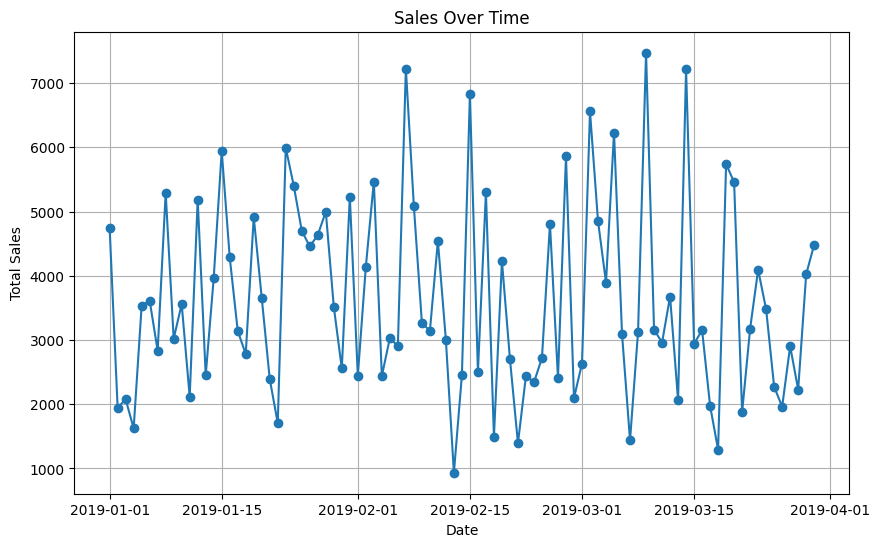

plot_sales_over_time took 0.1591 seconds to execute.


In [7]:
processor.summarize_data()
processor.plot_sales_over_time()